# seagliderOG1 demo

The purpose of this notebook is to demonstrate the functionality of `seagliderOG1` to convert from Seaglider basestation files to OG1 format.

- OG1 format is a newly agreed format (since June 2024) for glider data sets from various platforms (e.g., Seaglider, Slocum, Seaexplorer).  It lives on github here: (https://github.com/OceanGlidersCommunity/OG-format-user-manual).
- OG1 manual: https://oceangliderscommunity.github.io/OG-format-user-manual/OG_Format.html

The test case is to convert sg015 data from the Labrador Sea in September 2004.

The demo is organised to show

- Conversion of a single dive cycle (single `p*.nc` file)

- Conversion for a folder of local dive-cycle files (full mission of `p*.nc` files)

- Download from remote server + conversion (directory with full mission of `p*.nc` files)

Options are provided to only load e.g. 10 files, but note that OG1 format expects a full mission.


In [1]:
import pathlib
import sys

script_dir = pathlib.Path().parent.absolute()
parent_dir = script_dir.parents[0]
sys.path.append(str(parent_dir))
sys.path.append(str(parent_dir) + '/seagliderOG1')
print(parent_dir)
print(sys.path)
### silence future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import xarray as xr
import os
from seagliderOG1 import readers, writers, plotters
from seagliderOG1 import convertOG1, vocabularies


/home/runner/work/seagliderOG1/seagliderOG1
['/home/runner/micromamba/envs/TEST/lib/python313.zip', '/home/runner/micromamba/envs/TEST/lib/python3.13', '/home/runner/micromamba/envs/TEST/lib/python3.13/lib-dynload', '', '/home/runner/micromamba/envs/TEST/lib/python3.13/site-packages', '/home/runner/work/seagliderOG1/seagliderOG1', '/home/runner/work/seagliderOG1/seagliderOG1/seagliderOG1']


In [2]:
# Specify the path for writing datafiles
data_path = os.path.join(parent_dir, 'data')

## Reading basestation files

This has three ways to load a glider dataset.

Load an example dataset using `seagliderOG1.fetchers.load_sample_dataset`

Alternatively, use your own with e.g. `ds = xr.open_dataset('/path/to/yourfile.nc')`

### Load single sample dataset

In [3]:
ds = readers.load_sample_dataset()
ds

<xarray.Dataset> Size: 290kB
Dimensions:                                   (sg_data_point: 586,
                                               gc_event: 36, gc_state: 10,
                                               gps_info: 3, trajectory: 1)
Coordinates:
    ctd_time                                  (sg_data_point) datetime64[ns] 5kB ...
    longitude                                 (sg_data_point) float64 5kB ...
    latitude                                  (sg_data_point) float64 5kB ...
    ctd_depth                                 (sg_data_point) float64 5kB ...
  * trajectory                                (trajectory) int32 4B 15
Dimensions without coordinates: sg_data_point, gc_event, gc_state, gps_info
Data variables: (12/397)
    salinity_qc                               (sg_data_point) |S1 586B ...
    eng_depth                                 (sg_data_point) float64 5kB ...
    eng_aa4330_Temp                           (sg_data_point) float64 5kB ...
    eng_vbdCC                                 (sg_data_point) float64 5kB ...
    north_displacement                        (sg_data_point) float64 5kB ...
    east_displacement                         (sg_data_point) float64 5kB ...
    ...                                        ...
    sg_cal_optode_FoilCoefB0                  float64 8B ...
    log_MISSION                               int32 4B ...
    log_FG_AHR_24V                            float64 8B ...
    log_ICE_FREEZE_MARGIN                     float64 8B ...
    surface_curr_north                        float64 8B ...
    log_RAFOS_DEVICE                          float64 8B ...
Attributes: (12/59)
    quality_control_version:         1.12
    base_station_micro_version:      4935
    time_coverage_resolution:        PT1S
    geospatial_vertical_max:         511.8935394557861
    sea_name:                        Caribbean Sea
    mission:                         1
    ...                              ...
    source:                          Deepglider SG033
    geospatial_vertical_min:         0.2601223952664329
    creator_url:                     http://iop.apl.washington.edu/seaglider/...
    geospatial_vertical_units:       meter
    dive_number:                     15
    disclaimer:                      Data has not been reviewed and is provid...

### Load datasets from a local directory

In [4]:
# Specify the input directory on your local machine
input_dir = data_path + '/demo_sg005' ### chose the input directory with your data

# Load and concatenate all datasets in the input directory
# Optionally, specify the range of profiles to load (start_profile, end_profile)
list_datasets = readers.load_basestation_files(input_dir, start_profile=0, end_profile=5)

# Where list_datasets is a list of xarray datasets.  A single dataset can be accessed as
ds = list_datasets[0]

Loading datasets:   0%|          | 0/5 [00:00<?, ?file/s]

Loading datasets:  80%|████████  | 4/5 [00:00<00:00, 34.80file/s]

Loading datasets: 100%|██████████| 5/5 [00:00<00:00, 35.43file/s]

In [5]:
ds = readers.load_sample_dataset()

### Load datasets from a remote directory (URL)

In [6]:
# Specify the server where data are located
server = "https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/033/20100903/"

# Load and concatenate all datasets from the server, optionally specifying the range of profiles to load
list_datasets = readers.load_basestation_files(server, start_profile=1, end_profile=10)

Loading datasets:   0%|          | 0/10 [00:00<?, ?file/s]

Loading datasets:  10%|█         | 1/10 [00:00<00:03,  2.48file/s]

Loading datasets:  20%|██        | 2/10 [00:00<00:03,  2.46file/s]

Loading datasets:  30%|███       | 3/10 [00:01<00:03,  2.32file/s]

Loading datasets:  40%|████      | 4/10 [00:01<00:02,  2.26file/s]

Loading datasets:  50%|█████     | 5/10 [00:02<00:02,  2.21file/s]

Loading datasets:  60%|██████    | 6/10 [00:02<00:01,  2.17file/s]

Loading datasets:  70%|███████   | 7/10 [00:03<00:01,  2.15file/s]

Loading datasets:  80%|████████  | 8/10 [00:03<00:00,  2.15file/s]

Loading datasets:  90%|█████████ | 9/10 [00:04<00:00,  2.14file/s]

Loading datasets: 100%|██████████| 10/10 [00:04<00:00,  2.13file/s]

Loading datasets: 100%|██████████| 10/10 [00:04<00:00,  2.19file/s]

## Convert to OG1 format

Process:

1. For one basestation dataset, split the dataset by dimension (`split_ds`)
3. Transform into OG1 format: dataset with dims `sg_data_point`
    - Change the dimension to `N_MEASUREMENTS`
    - Rename variables according to `vocabularies.standard_names` 
    - Assign variable attributes according to `vocabularies.vocab_attrs`.  (Note: This *could* go wrong since it makes assumptions about the input variables. May need additional handling.)
4. Add missing mandatory variables: 
    - From `split_ds[(gps_info,)]`, add the `LATITUDE_GPS`, `LONGITUDE_GPS` and `TIME_GPS` (Note: presently `TIME_GPS` is stripped before saving, but `TIME` values contain `TIME_GPS`)
    - Create `PROFILE_NUMBER` and `PHASE`
    - Calculate `DEPTH_Z` which is positive up
5. Update attributes for the file. 
    - Combines `creator` and `contributor` from original attributes into `contributor`
    - Adds `contributing_institutions` based on `institution`
    - Reformats time in `time_coverage_*` and `start_time`--> `start_date`
    - Adds `date_modified`
    - Renames `comments`-->`history`, `site`-->`summary`
    - Adds `title`, `platform`, `platform_vocabulary`, `featureType`, `Conventions`, `rtqc_method*` according to OceanGliders format
    - Retains `naming_authority`, `institution`, `project`, `geospatial_*` as OG attributes
    - Retains extra attributes: `license`, `keywords`, `keywords_vocabulary`, `file_version`, `acknowledgement`, `date_created`, `disclaimer`

Future behaviour to be added:

6. Retain the variables starting with `sg_cal` and check whether they vary over the mission (shouldn't)
6. Add sensors, using information in the `split_ds` with no dimensions
    - Need (from sg_cal_constants: `sg_cal` plus `volmax`, `vbd_cnts_per_cc`, `therm_expan`, `t_*`, `mass`, `hd_*`, `ctcor`, `cpcor`, `c_*`, `abs_compress`, `a`, `Tcor`, `Soc`, `Pcor`, `Foffset`)
    - Maybe also `reviewed`, `magnetic_variation` (which will change with position), `log_D_FLARE`, `flight_avg_speed_north` and `flight_avg_speed_east` also with `_gsm`, `depth_avg_curr_north` and `depth_avg_curr_east` also with `_gsm`, 
    `wlbb2f` - means sensor
    `sg_cal_mission_title`
    `sg_cal_id_str`
    `calibcomm_oxygen`
    `calibcomm`
    `sbe41` means ??
    `hdm_qc`
    `glider`
    
### Convert a single (sample) dataset

Processing datasets:   0%|          | 0/1 [00:00<?, ?dataset/s]

Variable 'eng_depth' not in OG1 vocabulary.


Variable 'eng_aa4330_Temp' not in OG1 vocabulary.


Variable 'longitude_gsm' not in OG1 vocabulary.


Variable 'speed_gsm' not in OG1 vocabulary.


Variable 'vert_speed_gsm' not in OG1 vocabulary.


Variable 'eng_aa4330_TCPhase' not in OG1 vocabulary.


Variable 'eng_sbect_tempFreq' not in OG1 vocabulary.


Variable 'eng_sbect_condFreq' not in OG1 vocabulary.


Variable 'eng_rec' not in OG1 vocabulary.


Variable 'north_displacement_gsm' not in OG1 vocabulary.


Variable 'horz_speed_gsm' not in OG1 vocabulary.


No conversion information found for micromoles/kg to micromoles/kg


Variable 'eng_aa4330_O2' not in OG1 vocabulary.


Variable 'eng_aa4330_AirSat' not in OG1 vocabulary.


Variable 'latitude_gsm' not in OG1 vocabulary.


Variable 'aanderaa4330_instrument_dissolved_oxygen' not in OG1 vocabulary.


Variable 'eng_elaps_t_0000' not in OG1 vocabulary.


Variable 'buoyancy' not in OG1 vocabulary.


Variable 'east_displacement_gsm' not in OG1 vocabulary.


Variable 'sound_velocity' not in OG1 vocabulary.


Variable 'density_insitu' not in OG1 vocabulary.


Variable 'density' not in OG1 vocabulary.


Variable 'eng_aa4330_CalPhase' not in OG1 vocabulary.


Variable 'eng_GC_phase' not in OG1 vocabulary.


No conversion information found for cm s-1 to cm s-1


Variable 'conservative_temperature' not in OG1 vocabulary.


Variable 'glide_angle_gsm' not in OG1 vocabulary.


Variable 'eng_elaps_t' not in OG1 vocabulary.


Variable 'absolute_salinity' not in OG1 vocabulary.


No conversion information found for micromoles/kg to micromoles/kg


Variable 'ctd_pressure' not in OG1 vocabulary.


Variable 'depth' not in OG1 vocabulary.


Processing datasets: 100%|██████████| 1/1 [00:00<00:00,  1.48dataset/s]

Processing datasets: 100%|██████████| 1/1 [00:00<00:00,  1.48dataset/s]

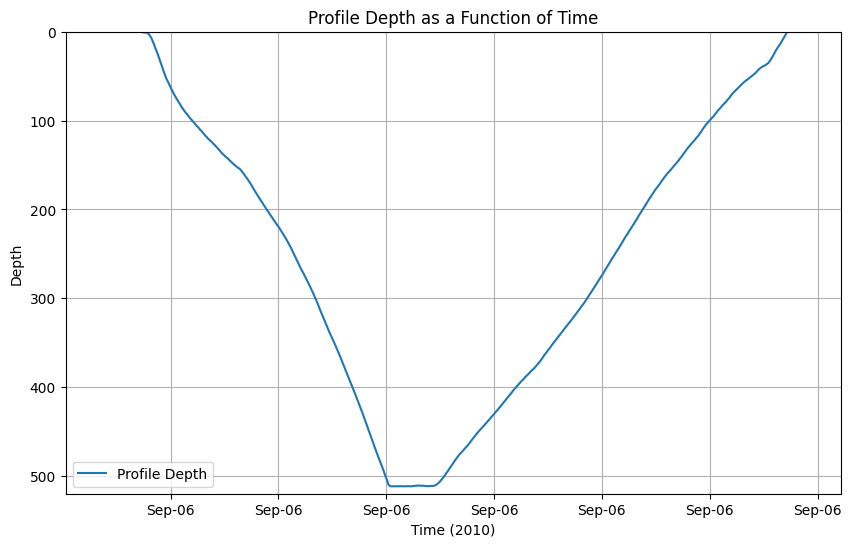

In [7]:
# Loads one dataset (p0150500_20050213.nc)
ds = readers.load_sample_dataset()

ds_OG1, var_list = convertOG1.convert_to_OG1(ds)

# Check the results - uncomment the following lines to either generate a plot or show the variables.
plotters.plot_profile_depth(ds_OG1)

In [8]:
### print the list of inital variables of the dataset
var_list

['log_ROLL_MAXERRORS',
 'log_CAP_FILE_SIZE',
 'conductivity',
 'log_PITCH_MAX',
 'log_D_FLARE',
 'sg_cal_optode_FoilCoefB8',
 'log_PITCH_CNV',
 'log_GLIDE_SLOPE',
 'log_PITCH_MIN',
 'gc_pitch_ctl',
 'log_TGT_AUTO_DEFAULT',
 'GPS1_qc',
 'log_D_OFFGRID',
 'log_STROBE',
 'sg_cal_optode_TempCoef3',
 'log_SURFACE_URGENCY',
 'gc_pitch_i',
 'density',
 'log_ALTIM_FREQUENCY',
 'gc_roll_secs',
 'log_KERMIT',
 'sg_cal_hd_c',
 'log_MINV_10V',
 'gc_roll_retries',
 'log_SEABIRD_C_J',
 'log_HUMID',
 'salinity_raw_qc',
 'log_T_ABORT',
 'horz_speed_gsm',
 'log_DEEPGLIDERMB',
 'log_DIVE',
 'flight_avg_speed_east_gsm',
 'flight_avg_speed_east',
 'sg_cal_optode_FoilCoefB3',
 'gc_end_secs',
 'log_T_GPS_CHARGE',
 'sg_cal_hd_s',
 'log_SM_CCo',
 'sg_cal_vbd_cnts_per_cc',
 'log_COMPASS_USE',
 'speed_qc',
 'log_LOGGERDEVICE2',
 'sg_cal_optode_TempCoef4',
 'log_ROLL_DEG',
 'eng_rollAng',
 'theta',
 'sg_cal_optode_TempCoef0',
 'conductivity_raw',
 'GPS2_qc',
 'eng_vbdCC',
 'sg_cal_mission_title',
 'log_D_TGT',
 

In [9]:
# Print to screen a table of attributes
plotters.show_contents(ds_OG1,'attrs')

information is based on xarray Dataset


Attribute  \
0                                       title   
1                                          id   
2                                    platform   
3                         platform_vocabulary   
4                            naming_authority   
5                                 institution   
6                          geospatial_lat_min   
7                          geospatial_lat_max   
8                          geospatial_lon_min   
9                          geospatial_lon_max   
10                    geospatial_vertical_min   
11                    geospatial_vertical_max   
12                        time_coverage_start   
13                          time_coverage_end   
14                                       site   
15                                    project   
16                           contributor_name   
17                           contributor_role   
18                contributor_role_vocabulary   
19                          contributor_email   
20                  contributing_institutions   
21       contributing_institutions_vocabulary   
22             contributing_institutions_role   
23  contributing_institutions_role_vocabulary   
24                                        uri   
25                                rtqc_method   
26                            rtqc_method_doi   
27                                    comment   
28                                 start_date   
29                               date_created   
30                                featureType   
31                                Conventions   
32                              date_modified   
33                               file_version   
34                                   keywords   
35                                 disclaimer   
36                        keywords_vocabulary   
37                             acknowledgment   
38                                    license   
39                          contributer_email   

                                                Value    DType  
0                        OceanGliders trajectory file      str  
1                       sg033_20100906T112156_delayed      str  
2                                 sub-surface gliders      str  
3   https://vocab.nerc.ac.uk/collection/L06/curren...      str  
4                                  edu.washington.apl      str  
5   School of Oceanography\nUniversity of Washingt...      str  
6                                  18.516025675252838  ndarray  
7                                  18.524446699350996  ndarray  
8                                  -65.98221600599415  ndarray  
9                                  -65.97450004341222  ndarray  
10                                                0.0  ndarray  
11                                 511.71017477249814  ndarray  
12                                    20100906T111037      str  
13                                    20100906T142637      str  
14  Test deployments of DeepGliders in the Puerto ...      str  
15              Rapid-Mocha San Juan 3 September 2010      str  
16                                    Charlie Eriksen      str  
17                                                 PI      str  
18             http://vocab.nerc.ac.uk/search_nvs/W08      str  
19                       charlie@ocean.washington.edu      str  
20  University of Washington - School of Oceanography      str  
21            https://edmo.seadatanet.org/report/1434      str  
22                                                 PI      str  
23    http://vocab.nerc.ac.uk/collection/W08/current/      str  
24               569b1f80-1985-11e7-8a51-0026bb609360      str  
25                                      No QC applied      str  
26                                                n/a      str  
27  Processing start:\nINFO: QC.py(418): Changed (...      str  
28                                    20100906T112156      str  
29                                    20170404T220433      str  
30         

In [10]:
# Print to screen a table of the variables and variable attributes
plotters.show_contents(ds_OG1,'variables')

information is based on xarray Dataset


### Convert mission from a local directory of basestation files

- For local data in the directory `input_dir`
- Creates a plot of ctd_depth against ctd_time.


Loading datasets:   0%|          | 0/5 [00:00<?, ?file/s]

Loading datasets:  80%|████████  | 4/5 [00:00<00:00, 38.92file/s]

Loading datasets: 100%|██████████| 5/5 [00:00<00:00, 38.68file/s]

Processing datasets:   0%|          | 0/5 [00:00<?, ?dataset/s]

Variable 'vert_speed_gsm' not in OG1 vocabulary.


Variable 'speed_gsm' not in OG1 vocabulary.


Variable 'sound_velocity' not in OG1 vocabulary.


No conversion information found for micromoles/kg to micromoles/kg


Variable 'north_displacement_gsm' not in OG1 vocabulary.


Variable 'longitude_gsm' not in OG1 vocabulary.


Variable 'latitude_gsm' not in OG1 vocabulary.


Variable 'horz_speed_gsm' not in OG1 vocabulary.


Variable 'glide_angle_gsm' not in OG1 vocabulary.


No conversion information found for cm s-1 to cm s-1


Variable 'eng_wlbb2f_VFtemp' not in OG1 vocabulary.


Variable 'eng_tempFreq' not in OG1 vocabulary.


Variable 'eng_sbe43_O2Freq' not in OG1 vocabulary.


Variable 'eng_elaps_t_0000' not in OG1 vocabulary.


Variable 'eng_elaps_t' not in OG1 vocabulary.


Variable 'eng_depth' not in OG1 vocabulary.


Variable 'eng_condFreq' not in OG1 vocabulary.


Variable 'east_displacement_gsm' not in OG1 vocabulary.


No conversion information found for micromoles/kg to micromoles/kg


Variable 'depth' not in OG1 vocabulary.


Variable 'density' not in OG1 vocabulary.


Variable 'buoyancy' not in OG1 vocabulary.


Processing datasets:  20%|██        | 1/5 [00:00<00:02,  1.98dataset/s]

Processing datasets:  40%|████      | 2/5 [00:00<00:01,  2.01dataset/s]

Processing datasets:  60%|██████    | 3/5 [00:01<00:00,  2.02dataset/s]

Processing datasets:  80%|████████  | 4/5 [00:01<00:00,  2.02dataset/s]

Processing datasets: 100%|██████████| 5/5 [00:02<00:00,  2.03dataset/s]

Processing datasets: 100%|██████████| 5/5 [00:02<00:00,  2.02dataset/s]

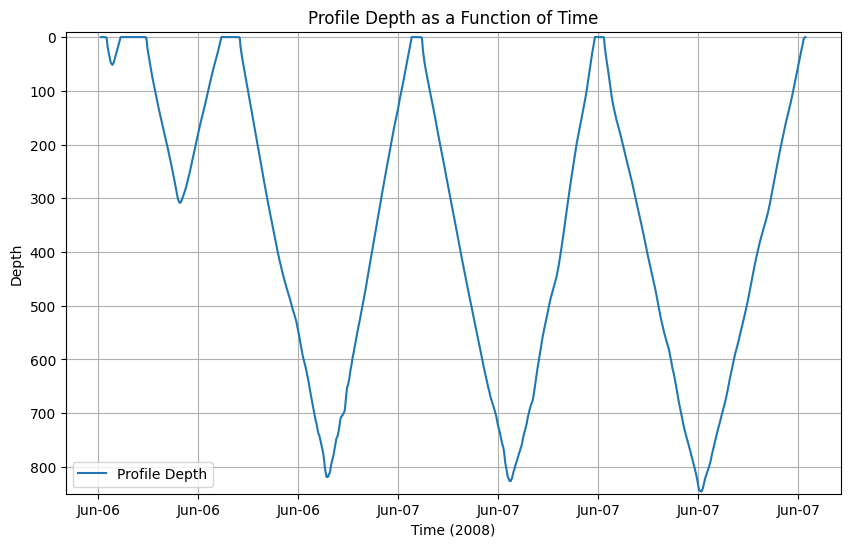

information is based on xarray Dataset


Attribute  \
0                                       title   
1                                          id   
2                                    platform   
3                         platform_vocabulary   
4                            naming_authority   
5                                 institution   
6                          geospatial_lat_min   
7                          geospatial_lat_max   
8                          geospatial_lon_min   
9                          geospatial_lon_max   
10                    geospatial_vertical_min   
11                    geospatial_vertical_max   
12                        time_coverage_start   
13                          time_coverage_end   
14                                       site   
15                                    project   
16                           contributor_name   
17                           contributor_role   
18                contributor_role_vocabulary   
19                          contributor_email   
20                  contributing_institutions   
21       contributing_institutions_vocabulary   
22             contributing_institutions_role   
23  contributing_institutions_role_vocabulary   
24                                        uri   
25                                rtqc_method   
26                            rtqc_method_doi   
27                                    comment   
28                                 start_date   
29                               date_created   
30                                featureType   
31                                Conventions   
32                              date_modified   
33                               file_version   
34                                   keywords   
35                                 disclaimer   
36                        keywords_vocabulary   
37                             acknowledgment   
38                                    license   
39                          contributer_email   

                                                Value    DType  
0                        OceanGliders trajectory file      str  
1                       sg005_20080606T180738_delayed      str  
2                                 sub-surface gliders      str  
3   https://vocab.nerc.ac.uk/collection/L06/curren...      str  
4                                  edu.washington.apl      str  
5   School of Oceanography\nUniversity of Washingt...      str  
6                                   61.41231666666666  ndarray  
7                                   61.57591666666667  ndarray  
8                                  -8.747133333333332  ndarray  
9                                  -8.273983333333332  ndarray  
10                                -0.3214989667970032  ndarray  
11                                  845.8311973927603  ndarray  
12                                    20080606T180256      str  
13                                    20080607T080838      str  
14  Multiple transects of Faroe-Iceland Ridge uppe...      str  
15                  Iceland Scotland Ridge June 2008       str  
16                      Charlie Eriksen, Peter Rhines      str  
17                         PI, Principal investigator      str  
18           http://vocab.nerc.ac.uk/search_nvs/W08,       str  
19                                   eriksen@uw.edu,       str  
20  University of Washington - School of Oceanogra...      str  
21          https://edmo.seadatanet.org/report/1434,       str  
22                                               PI,       str  
23  http://vocab.nerc.ac.uk/collection/W08/current/,       str  
24               9e33a22e-a959-11e3-b35f-0026bb609360      str  
25                                      No QC applied      str  
26                                                n/a      str  
27  Processing start:\n20:13:32 11 Mar 2014 UTC: I...      str  
28                                    20080606T180738      str  
29                                    20140311T200332      str  
30         

In [11]:
# Specify the input directory on your local machine
input_dir = data_path + '/demo_sg005' ### chose the input directory with your data

# Load and concatenate all datasets in the input directory
# Optionally, specify the range of profiles to load (start_profile, end_profile)
list_datasets = readers.load_basestation_files(input_dir, start_profile=1, end_profile=5)

# Convert the list of datasets to OG1
ds_OG1, var_list = convertOG1.convert_to_OG1(list_datasets)

# Generate a simple plot
plotters.plot_profile_depth(ds_OG1)
plotters.show_contents(ds_OG1,'attrs')

### Convert mission from the NCEI server (with p*nc files)

- Data from the sg015 mission in the Labrador Sea (https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.nodc:0111844), dataset identifier gov.noaa.nodc:0111844.


In [12]:
# Specify the server where data are located
server = "https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/033/20100903/"

# Load and concatenate all datasets from the server, optionally specifying the range of profiles to load
list_datasets = readers.load_basestation_files(server, start_profile=1, end_profile=19)

# Convert the list of datasets to OG1
ds_OG1, var_list = convertOG1.convert_to_OG1(list_datasets)

Loading datasets:   0%|          | 0/19 [00:00<?, ?file/s]

Loading datasets:  21%|██        | 4/19 [00:00<00:00, 32.90file/s]

Loading datasets:  42%|████▏     | 8/19 [00:00<00:00, 33.62file/s]

Loading datasets:  63%|██████▎   | 12/19 [00:01<00:00,  7.73file/s]

Loading datasets:  79%|███████▉  | 15/19 [00:02<00:00,  5.01file/s]

Loading datasets:  89%|████████▉ | 17/19 [00:03<00:00,  3.80file/s]

Loading datasets:  95%|█████████▍| 18/19 [00:03<00:00,  3.41file/s]

Loading datasets: 100%|██████████| 19/19 [00:04<00:00,  3.09file/s]

Loading datasets: 100%|██████████| 19/19 [00:04<00:00,  4.60file/s]

Processing datasets:   0%|          | 0/19 [00:00<?, ?dataset/s]

Variable 'eng_depth' not in OG1 vocabulary.


Variable 'eng_aa4330_Temp' not in OG1 vocabulary.


Variable 'longitude_gsm' not in OG1 vocabulary.


Variable 'speed_gsm' not in OG1 vocabulary.


Variable 'vert_speed_gsm' not in OG1 vocabulary.


Variable 'eng_aa4330_TCPhase' not in OG1 vocabulary.


Variable 'eng_sbect_tempFreq' not in OG1 vocabulary.


Variable 'eng_sbect_condFreq' not in OG1 vocabulary.


Variable 'eng_rec' not in OG1 vocabulary.


Variable 'north_displacement_gsm' not in OG1 vocabulary.


Variable 'horz_speed_gsm' not in OG1 vocabulary.


No conversion information found for micromoles/kg to micromoles/kg


Variable 'eng_aa4330_O2' not in OG1 vocabulary.


Variable 'eng_aa4330_AirSat' not in OG1 vocabulary.


Variable 'latitude_gsm' not in OG1 vocabulary.


Variable 'aanderaa4330_instrument_dissolved_oxygen' not in OG1 vocabulary.


Variable 'eng_elaps_t_0000' not in OG1 vocabulary.


Variable 'buoyancy' not in OG1 vocabulary.


Variable 'east_displacement_gsm' not in OG1 vocabulary.


Variable 'sound_velocity' not in OG1 vocabulary.


Variable 'density_insitu' not in OG1 vocabulary.


Variable 'density' not in OG1 vocabulary.


Variable 'eng_aa4330_CalPhase' not in OG1 vocabulary.


Variable 'eng_GC_phase' not in OG1 vocabulary.


No conversion information found for cm s-1 to cm s-1


Variable 'conservative_temperature' not in OG1 vocabulary.


Variable 'glide_angle_gsm' not in OG1 vocabulary.


Variable 'eng_elaps_t' not in OG1 vocabulary.


Variable 'absolute_salinity' not in OG1 vocabulary.


No conversion information found for micromoles/kg to micromoles/kg


Variable 'ctd_pressure' not in OG1 vocabulary.


Variable 'depth' not in OG1 vocabulary.


Processing datasets:   5%|▌         | 1/19 [00:00<00:12,  1.48dataset/s]

Processing datasets:  11%|█         | 2/19 [00:01<00:11,  1.50dataset/s]

Processing datasets:  16%|█▌        | 3/19 [00:01<00:10,  1.51dataset/s]

Processing datasets:  21%|██        | 4/19 [00:02<00:09,  1.52dataset/s]

Processing datasets:  26%|██▋       | 5/19 [00:03<00:09,  1.52dataset/s]

Processing datasets:  32%|███▏      | 6/19 [00:03<00:08,  1.52dataset/s]

Processing datasets:  37%|███▋      | 7/19 [00:04<00:07,  1.52dataset/s]

Processing datasets:  42%|████▏     | 8/19 [00:05<00:07,  1.51dataset/s]

Processing datasets:  47%|████▋     | 9/19 [00:05<00:06,  1.50dataset/s]

Processing datasets:  53%|█████▎    | 10/19 [00:06<00:05,  1.50dataset/s]

Processing datasets:  58%|█████▊    | 11/19 [00:07<00:05,  1.50dataset/s]

Processing datasets:  63%|██████▎   | 12/19 [00:07<00:04,  1.50dataset/s]

Processing datasets:  68%|██████▊   | 13/19 [00:08<00:03,  1.50dataset/s]

Processing datasets:  74%|███████▎  | 14/19 [00:09<00:03,  1.45dataset/s]

Processing datasets:  79%|███████▉  | 15/19 [00:10<00:02,  1.47dataset/s]

Processing datasets:  84%|████████▍ | 16/19 [00:10<00:02,  1.49dataset/s]

Processing datasets:  89%|████████▉ | 17/19 [00:11<00:01,  1.49dataset/s]

Processing datasets:  95%|█████████▍| 18/19 [00:11<00:00,  1.50dataset/s]

Processing datasets: 100%|██████████| 19/19 [00:12<00:00,  1.50dataset/s]

Processing datasets: 100%|██████████| 19/19 [00:12<00:00,  1.50dataset/s]

## Saving data

Due to problems with writing `xarray` datasets as netCDF when attributes are not of a specified type (`str`, `Number`, `np.ndarray`, `np.number`, `list`, `tuple`), a function was written `save_dataset`.

In [13]:
# Write the file
# This writer catches errors in data types (DType errors) when using xr.to_netcdf()
# The solution is to convert them to strings, which may be undesired behaviour
output_file = os.path.join(data_path, 'demo_test.nc')
if os.path.exists(output_file):
    os.remove(output_file)

writers.save_dataset(ds_OG1, output_file);

/home/runner/work/seagliderOG1/seagliderOG1/seagliderOG1/writers.py:47: UserWarning: Times can't be serialized faithfully to int64 with requested units 'seconds since 1970-01-01T00:00:00+00:00'. Resolution of 'nanoseconds' needed. Serializing times to floating point instead. Set encoding['dtype'] to integer dtype to serialize to int64. Set encoding['dtype'] to floating point dtype to silence this warning.
  ds.to_netcdf(output_file, format="NETCDF4")


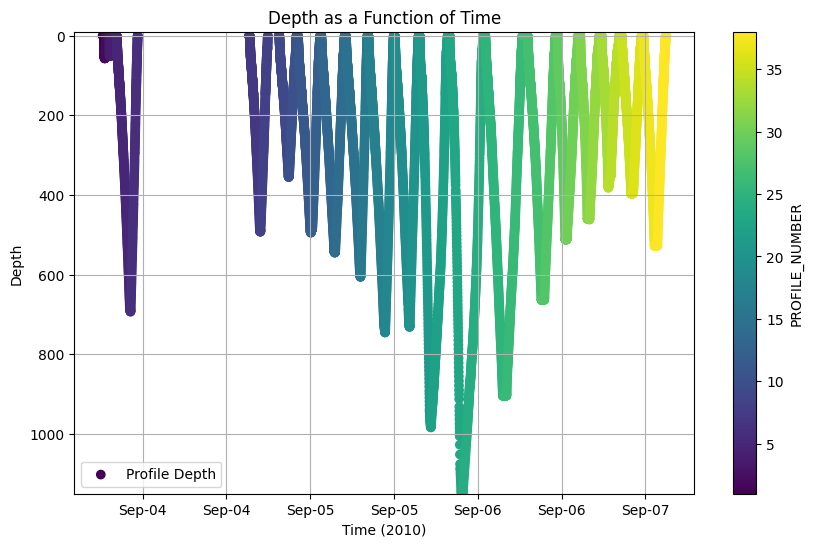

In [14]:
# Load the data saved
ds1 = xr.open_dataset(output_file)

# Generate a simple plot
#plotters.show_contents(ds_all,'attrs')
plotters.plot_depth_colored(ds1, color_by='PROFILE_NUMBER')


## Run multiple missions

In [15]:
# Add these to existing attributes - update to your details
contrib_to_append = vocabularies.contrib_to_append
print(contrib_to_append)

{'contributor_name': 'Eleanor Frajka-Williams', 'contributor_email': 'eleanorfrajka@gmail.com', 'contributor_role': 'Data scientist', 'contributor_role_vocabulary': 'http://vocab.nerc.ac.uk/search_nvs/W08', 'contributing_institutions': 'University of Hamburg - Institute of Oceanography', 'contributing_institutions_vocabulary': 'https://edmo.seadatanet.org/report/1156', 'contributing_institutions_role': 'Data scientist', 'contributing_institutions_role_vocabulary': 'http://vocab.nerc.ac.uk/search_nvs/W08'}


In [16]:
# Specify a list of servers or local directories
input_locations = [
    # Either Iceland, Faroes or RAPID/MOCHA
    #"https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/005/20090829/", # done
    #"https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/005/20080606/", # done
    #"https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/005/20081106/", # done
    #"https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/012/20070831/", # done
    #"https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/014/20080214/",  # done
    #"https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/014/20080222/", # done
    #"https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/016/20061112/",  # done
    #"https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/016/20090605/", # done
    #"https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/016/20071113/", # done
    #"https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/016/20080607/",  # done
    #"https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/033/20100518/", # done
    "https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/033/20100903/", # done
    #"https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/101/20081108/",     # done
    #"https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/101/20061112/",    # done
    #"https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/101/20070609/",   # done
    #"https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/102/20061112/",  # done
    # Labrador Sea
    #"https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/015/20040924/",
    #"https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/014/20040924/",
    #"https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/008/20031002/",
    #"https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/004/20031002/",
    #"https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/016/20050406/",
    # RAPID/MOCHA
    #"https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/033/20100729/",
    #"https://www.ncei.noaa.gov/data/oceans/glider/seaglider/uw/034/20110128/",
]

for input_loc in input_locations:
    # Example usage
    ds_all = convertOG1.process_and_save_data(input_loc, output_dir=data_path, save=True,  run_quietly=True)

Loading datasets:   0%|          | 0/1 [00:00<?, ?file/s]

Loading datasets: 100%|██████████| 1/1 [00:00<00:00, 33.17file/s]

Processing datasets:   0%|          | 0/1 [00:00<?, ?dataset/s]

Variable 'eng_depth' not in OG1 vocabulary.


Variable 'eng_aa4330_Temp' not in OG1 vocabulary.


Variable 'longitude_gsm' not in OG1 vocabulary.


Variable 'speed_gsm' not in OG1 vocabulary.


Variable 'vert_speed_gsm' not in OG1 vocabulary.


Variable 'eng_aa4330_TCPhase' not in OG1 vocabulary.


Variable 'eng_sbect_tempFreq' not in OG1 vocabulary.


Variable 'eng_sbect_condFreq' not in OG1 vocabulary.


Variable 'eng_rec' not in OG1 vocabulary.


Variable 'north_displacement_gsm' not in OG1 vocabulary.


Variable 'horz_speed_gsm' not in OG1 vocabulary.


No conversion information found for micromoles/kg to micromoles/kg


Variable 'eng_aa4330_O2' not in OG1 vocabulary.


Variable 'eng_aa4330_AirSat' not in OG1 vocabulary.


Variable 'latitude_gsm' not in OG1 vocabulary.


Variable 'aanderaa4330_instrument_dissolved_oxygen' not in OG1 vocabulary.


Variable 'eng_elaps_t_0000' not in OG1 vocabulary.


Variable 'buoyancy' not in OG1 vocabulary.


Variable 'east_displacement_gsm' not in OG1 vocabulary.


Variable 'sound_velocity' not in OG1 vocabulary.


Variable 'density_insitu' not in OG1 vocabulary.


Variable 'density' not in OG1 vocabulary.


Variable 'eng_aa4330_CalPhase' not in OG1 vocabulary.


Variable 'eng_GC_phase' not in OG1 vocabulary.


No conversion information found for cm s-1 to cm s-1


Variable 'conservative_temperature' not in OG1 vocabulary.


Variable 'glide_angle_gsm' not in OG1 vocabulary.


Variable 'eng_elaps_t' not in OG1 vocabulary.


Variable 'absolute_salinity' not in OG1 vocabulary.


No conversion information found for micromoles/kg to micromoles/kg


Variable 'ctd_pressure' not in OG1 vocabulary.


Variable 'depth' not in OG1 vocabulary.


Processing datasets: 100%|██████████| 1/1 [00:00<00:00,  1.45dataset/s]

Processing datasets: 100%|██████████| 1/1 [00:00<00:00,  1.45dataset/s]


File /home/runner/work/seagliderOG1/seagliderOG1/data/sg033_20100903T182416_delayed.nc already exists. Exiting the process.


File /home/runner/work/seagliderOG1/seagliderOG1/data/sg033_20100903T182416_delayed.nc already exists. Exiting the process.
